In [663]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import os

In [664]:
def shuffle_two_list(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])

In [665]:
def create_dataset(path):
    X=[]
    y=[]
    for i in range(len(os.listdir(path))):
        for j in os.listdir(str(path)+"/"+str(i)):
            img=rgb2gray(plt.imread(str(path)+"/"+str(i)+"/"+str(j)))
            X.append(img)
            y.append(i)
    X=np.array(X)
    y=np.array(y)
    return X,y

In [666]:
X, y = create_dataset("C:\\Users\\FI\\Desktop\\imzalar")

In [667]:
X,y= shuffle_two_list(X,y)

In [668]:
X.shape

(186, 200, 200)

In [669]:
X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [670]:
X.shape

(186, 40000)

In [671]:
X=X/255.0

In [672]:
digits = 6
examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [673]:
m = 160
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [674]:
X_train.shape

(40000, 160)

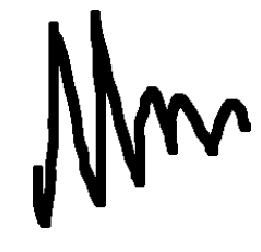

array([1., 0., 0., 0., 0., 0.])

In [675]:
i = 12
plt.imshow(X_train[:,i].reshape(200,200),cmap='gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [676]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [677]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [678]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [679]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  4.19111714785856
Epoch 100 cost:  1.1115795401968558
Epoch 200 cost:  0.7355027218914043
Epoch 300 cost:  0.5131688682398873
Epoch 400 cost:  0.3539940263529933
Epoch 500 cost:  0.22873189363468596
Epoch 600 cost:  0.15467198018288364
Epoch 700 cost:  0.12042169457725523
Epoch 800 cost:  0.09638160898829484
Epoch 900 cost:  0.07898499446879026
Epoch 1000 cost:  0.0660422640696863
Epoch 1100 cost:  0.056173507114388066
Epoch 1200 cost:  0.04848096312195236
Epoch 1300 cost:  0.0423634615017659
Epoch 1400 cost:  0.037422469939194646
Epoch 1500 cost:  0.033374663075994175
Epoch 1600 cost:  0.030014283179904084
Epoch 1700 cost:  0.027189530450965928
Epoch 1800 cost:  0.024789797095650837
Epoch 1900 cost:  0.022732045093816173
Final cost: 0.0209691739506201


In [680]:
from sklearn.metrics import classification_report, confusion_matrix

In [681]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[4 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 2 0 0]
 [0 1 0 0 3 0]
 [0 0 0 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         6

    accuracy                           0.96        26
   macro avg       0.97      0.96      0.96        26
weighted avg       0.97      0.96      0.96        26



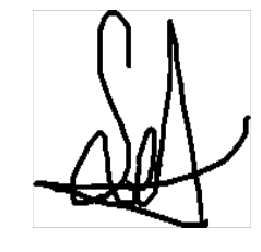

array([0., 0., 1., 0., 0., 0.])

In [683]:
i = 8
plt.imshow(X_test[:,i].reshape(200,200),cmap='gray')
plt.axis("off")
plt.show()
Y_test[:,i]

In [685]:
# 6 farklı kişinin imza görüntülerinden oluşturulmuş veri setimizi 160 train 26 test olacak şekilde ikiye ayırdık.
# Daha sonra modelin ezberlememesi, test verisindeki görüntülerin aynı olmaması için verilerin sırasını rastgele değiştirdik.
# Eğitim sonunda modelimizin %97 başarıya ulaşmış oldu. Confusion matrix üzerinde bunları görebiliyoruz.
# 2. indexte bulunan kendi imza verimi test ettiğimde ise doğru sonuçlandığını görmekteyim. Confusion matrix üzerinde 2. indexin
# %100 doğru sınıflandığı da belirgin.